In [1]:
import glob

import csv
import statistics
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

plt.style.use(['science', 'ieee', 'no-latex'])  #pip install SciencePlots==1.0.9

In [2]:
def imprt():
    M = {}
    P = {}
    
    with open('C:/Users/Coen/Documents/GitHub/CT_schedule/data/missions.csv', mode='r',encoding='utf-8-sig') as f:
        reader = csv.reader(f)
        for row in reader:
            M[row[0]] = np.genfromtxt(row[1:10], dtype='int')
    
    with open('C:/Users/Coen/Documents/GitHub/CT_schedule/data/pilots.csv', mode='r',encoding='utf-8-sig') as f:
        reader = csv.reader(f)
        for row in reader:
            P[row[0]] = np.genfromtxt(row[1:6], dtype='int')
    return M, P

In [3]:
def read_history_live(hist):
    no_sorties = list()
    min_CT = 0 
    for p in P: 
        total_sorties_p = sum(hist[p].values())
        no_sorties.append(total_sorties_p)
        if P[p][4] > 0:
            check_min = total_sorties_p >= 41
        else:
            check_min = total_sorties_p >= 58
        count = 0
        for m in M:     
            if hist[p][m] - M[m][P[p][0]] < 0:
                count += 1
                print(f'min LIVE failed for pilot {p} on mission {m}')
        if count <= 0 and check_min:
            min_CT += 1
    des_CT = 0 
    sorties = sum([sum(hist[k].values()) for k in hist.keys()])
    for p in P:
        total_sorties_p = sum(hist[p].values())
        if P[p][4] > 0:
            check_desired = total_sorties_p >= 69
        else:
            check_desired = total_sorties_p >= 73
        count = 0
        for m in M:
            if hist[p][m] - M[m][P[p][1]] < 0:
                count += 1
                print(f'desired LIVE failed for pilot {p} on mission {m}')
        if count <= 0 and check_desired:
            des_CT += 1
    
    return min_CT, des_CT, sorties, no_sorties

In [4]:
def read_history_sim(hist_sim):
    no_sorties = list()
    min_CT = 0 
    for p in P: 
        total_sorties_p = sum(hist_sim[p].values())
        no_sorties.append(total_sorties_p)
        if P[p][4] > 0:
            check_min = total_sorties_p >= 37
        else:
            check_min = total_sorties_p >= 42
        count = 0
        for m in M:     
            if hist_sim[p][m] - M[m][P[p][2]] < 0:
                count += 1
                print(f'min SIM failed for pilot {p} on mission {m}')
        if count <= 0 and check_min:
            min_CT += 1
    des_CT = 0 
    sorties = sum([sum(hist_sim[k].values()) for k in hist.keys()])
    for p in P:
        total_sorties_p = sum(hist[p].values())
        if P[p][4] > 0:
            check_desired = total_sorties_p >= 53
        else:
            check_desired = total_sorties_p >= 72
        count = 0
        for m in M:
            if hist_sim[p][m] - M[m][P[p][P[p][3]]] < 0:
                count += 1
                print(f'desired SIM failed for pilot {p} on mission {m}')
        if count <= 0 and check_desired:
            des_CT += 1
    
    return min_CT, des_CT, sorties, no_sorties

In [5]:
M, P = imprt()

In [6]:
data = np.full((len(glob.glob('*CTresults_live.txt')),6), 0)
i = 0
print('live missions:')
for file in glob.glob('*CTresults_live.txt'):
    with open(file) as f:
        hist = json.load(f)
        min_CT, des_CT, sorties, no_sorties_live = read_history_live(hist)
        data[i][0] = min_CT
        data[i][1] = des_CT
        data[i][2] = sorties
        i += 1
i = 0
print('sim missions:')
for simfile in glob.glob('*CTresults_sim.txt'):
    with open(simfile) as g:
        hist_sim = json.load(g)
        min_CT, des_CT, sorties, no_sorties_sim = read_history_sim(hist_sim)
        data[i][3] = min_CT
        data[i][4] = des_CT
        data[i][5] = sorties
        i += 1

live missions:
min LIVE failed for pilot Cougar on mission AI_n_4
desired LIVE failed for pilot Maverick on mission SDEAD_d_4
desired LIVE failed for pilot Cougar on mission AI_n_4
desired LIVE failed for pilot Charlie on mission CAS_d_4
desired LIVE failed for pilot Chipper on mission DCA_d_4
desired LIVE failed for pilot Danger on mission OCA_d_4
min LIVE failed for pilot Iceman on mission DCA_n_4
min LIVE failed for pilot Iceman on mission CAS_n_4
min LIVE failed for pilot Charlie on mission DCA_n_4
desired LIVE failed for pilot Iceman on mission DCA_n_4
desired LIVE failed for pilot Iceman on mission CAS_n_4
desired LIVE failed for pilot Charlie on mission DCA_n_4
min LIVE failed for pilot Stinger on mission AI_n_4
min LIVE failed for pilot Slider on mission SDEAD_n_4
min LIVE failed for pilot Danger on mission AI_n_4
desired LIVE failed for pilot Stinger on mission AI_n_4
desired LIVE failed for pilot Slider on mission SDEAD_n_4
desired LIVE failed for pilot Hollywood on mission A

In [7]:
run_data = []
for file in glob.glob('*_data.txt'):
    with open(file) as f:
        a = json.load(f)
        run_data.append(a["FHR_cummulative"])

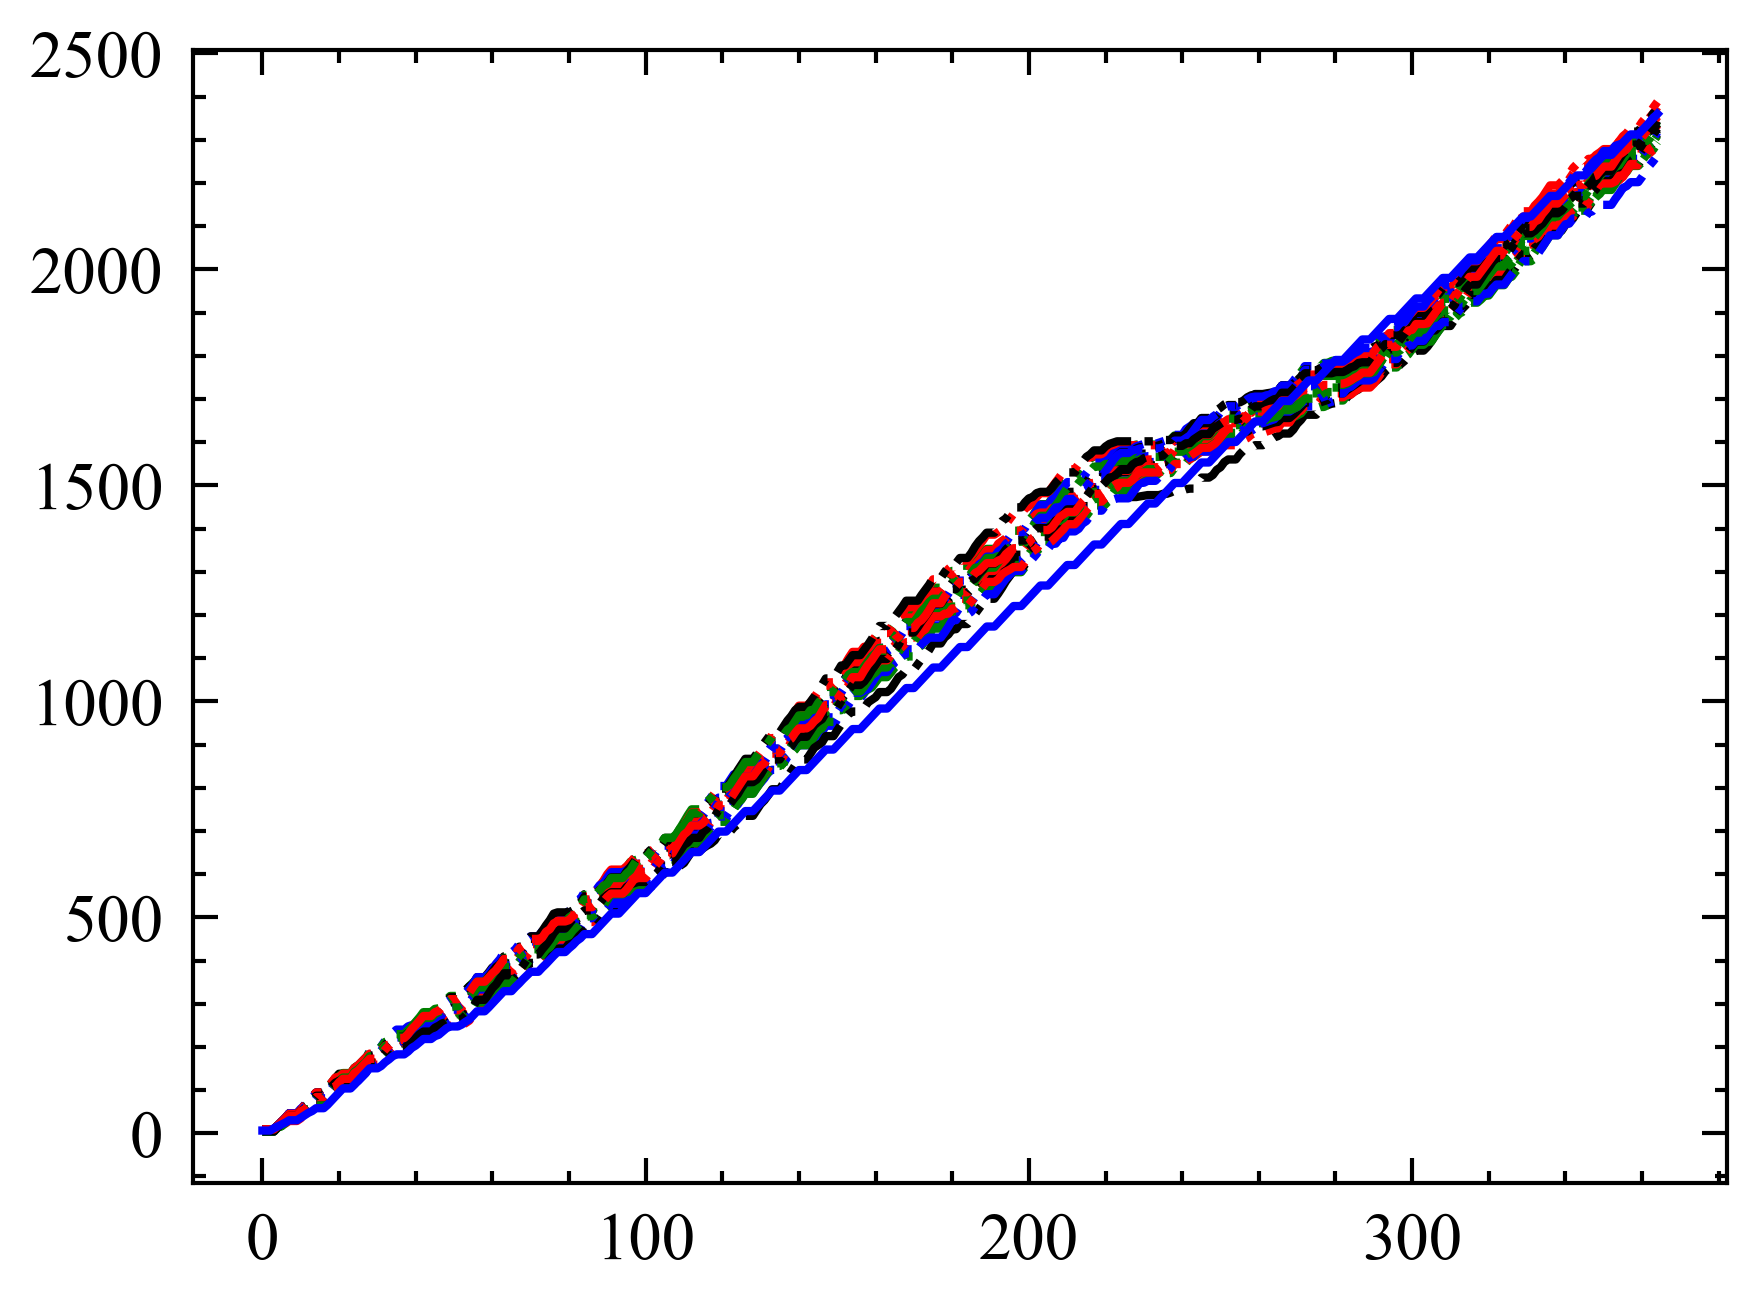

In [25]:
#for i in range(len(run_data)):
#    print(max(run_data[i]))
for i in range(30):
    plt.plot(run_data[i], linestyle='dashdot')
plt.plot(a["FT_FMP"], linestyle='-')
plt.savefig('FHR.jpg', dpi=300)

In [9]:
pilotFL = list()
for p in P:
    pilotFL.append(P[p][4])
print(no_sorties_live)
print(sum(no_sorties_live))
print(no_sorties_sim)
print(sum(no_sorties_sim))
print(pilotFL)
for i in range(len(no_sorties_live)):
    print(no_sorties_live[i]+(no_sorties_sim[i]))

[86, 86, 87, 86, 91, 91, 88, 91, 83, 88, 86, 86, 93, 90, 81, 90, 86, 80]
1569
[69, 67, 69, 75, 90, 88, 89, 90, 74, 68, 67, 72, 88, 92, 90, 85, 71, 73]
1417
[4, 4, 2, 2, 0, 0, 0, 0, 4, 4, 2, 2, 0, 0, 0, 0, 4, 4]
155
153
156
161
181
179
177
181
157
156
153
158
181
182
171
175
157
153


In [10]:
for i in range(len(data)):
    print(data[i,4])

16
17
15
17
16
15
18
18
17
15
18
16
17
17
18
17
17
16
18
17
17
18
18
17
16
17
18
16
18
18


In [11]:
for i in range(len(data)):
    print(min(data[i]))

15
16
15
13
15
15
14
15
17
15
17
15
9
14
13
12
14
16
13
14
16
13
16
15
16
16
15
16
18
16


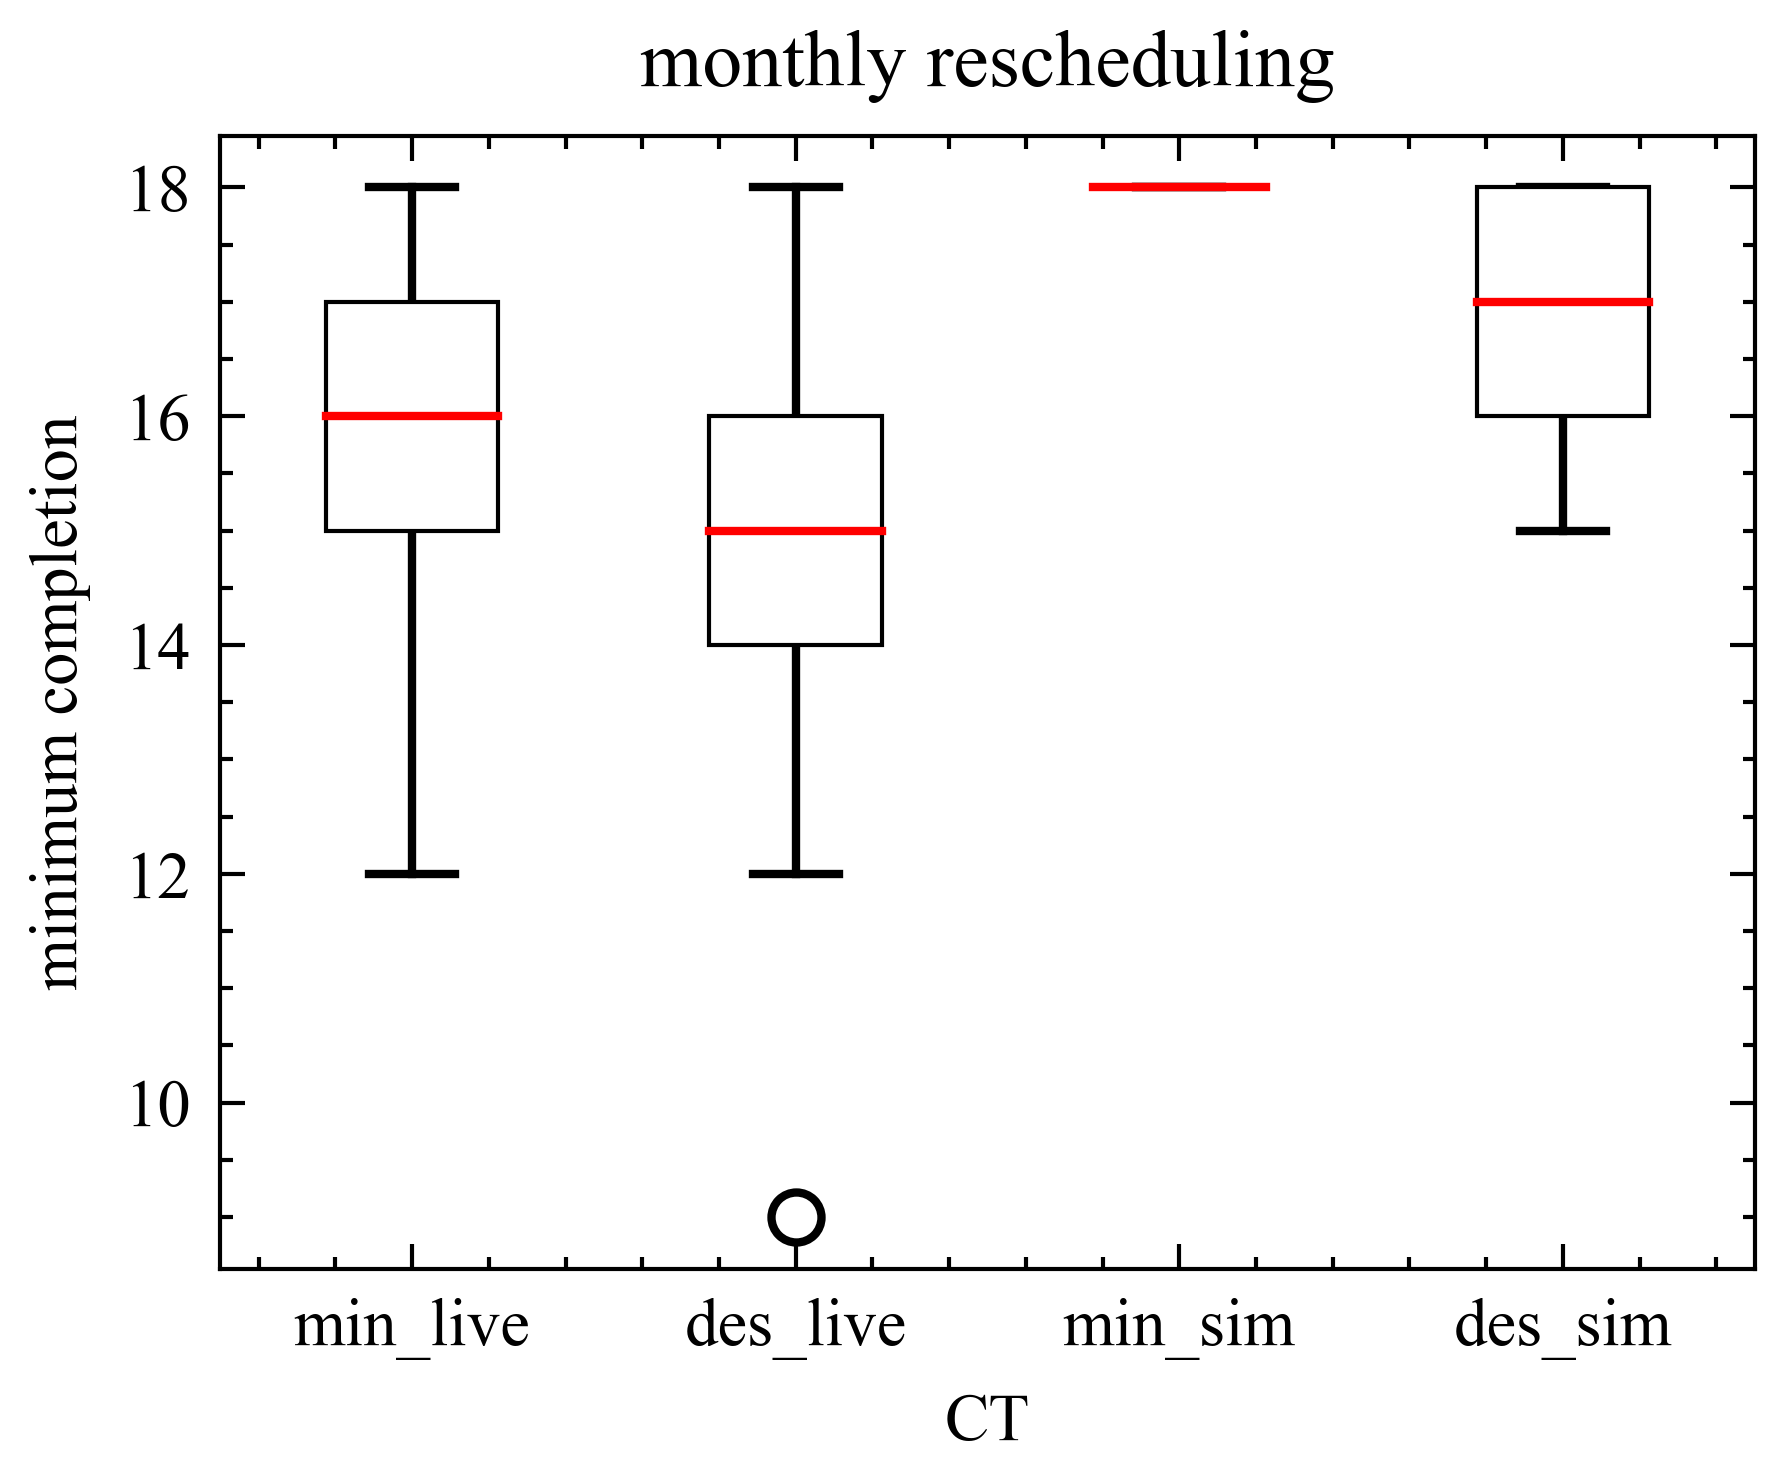

In [12]:
fig, ax = plt.subplots()
boxes = [data[0:30,0], data[0:30,1], data[0:30,3], data[0:30,4]]
bp = ax.boxplot(boxes, patch_artist=True)
ax.set(xlabel='CT'.format('Arial'))
ax.set(ylabel='minimum completion'.format('Arial'))
ax.set_title('monthly rescheduling'.format('Arial'))
ax.set_xticklabels(['min_live', 'des_live', 'min_sim', 'des_sim', f'{len(data)}'])
for box in bp['boxes']:
    box.set( color='k', linewidth=0.5)
    box.set( facecolor = 'w' )

for flier in bp['fliers']:
    flier.set(marker='o', color='r')#, alpha=0.5
fig.savefig('box.jpg', dpi=300)

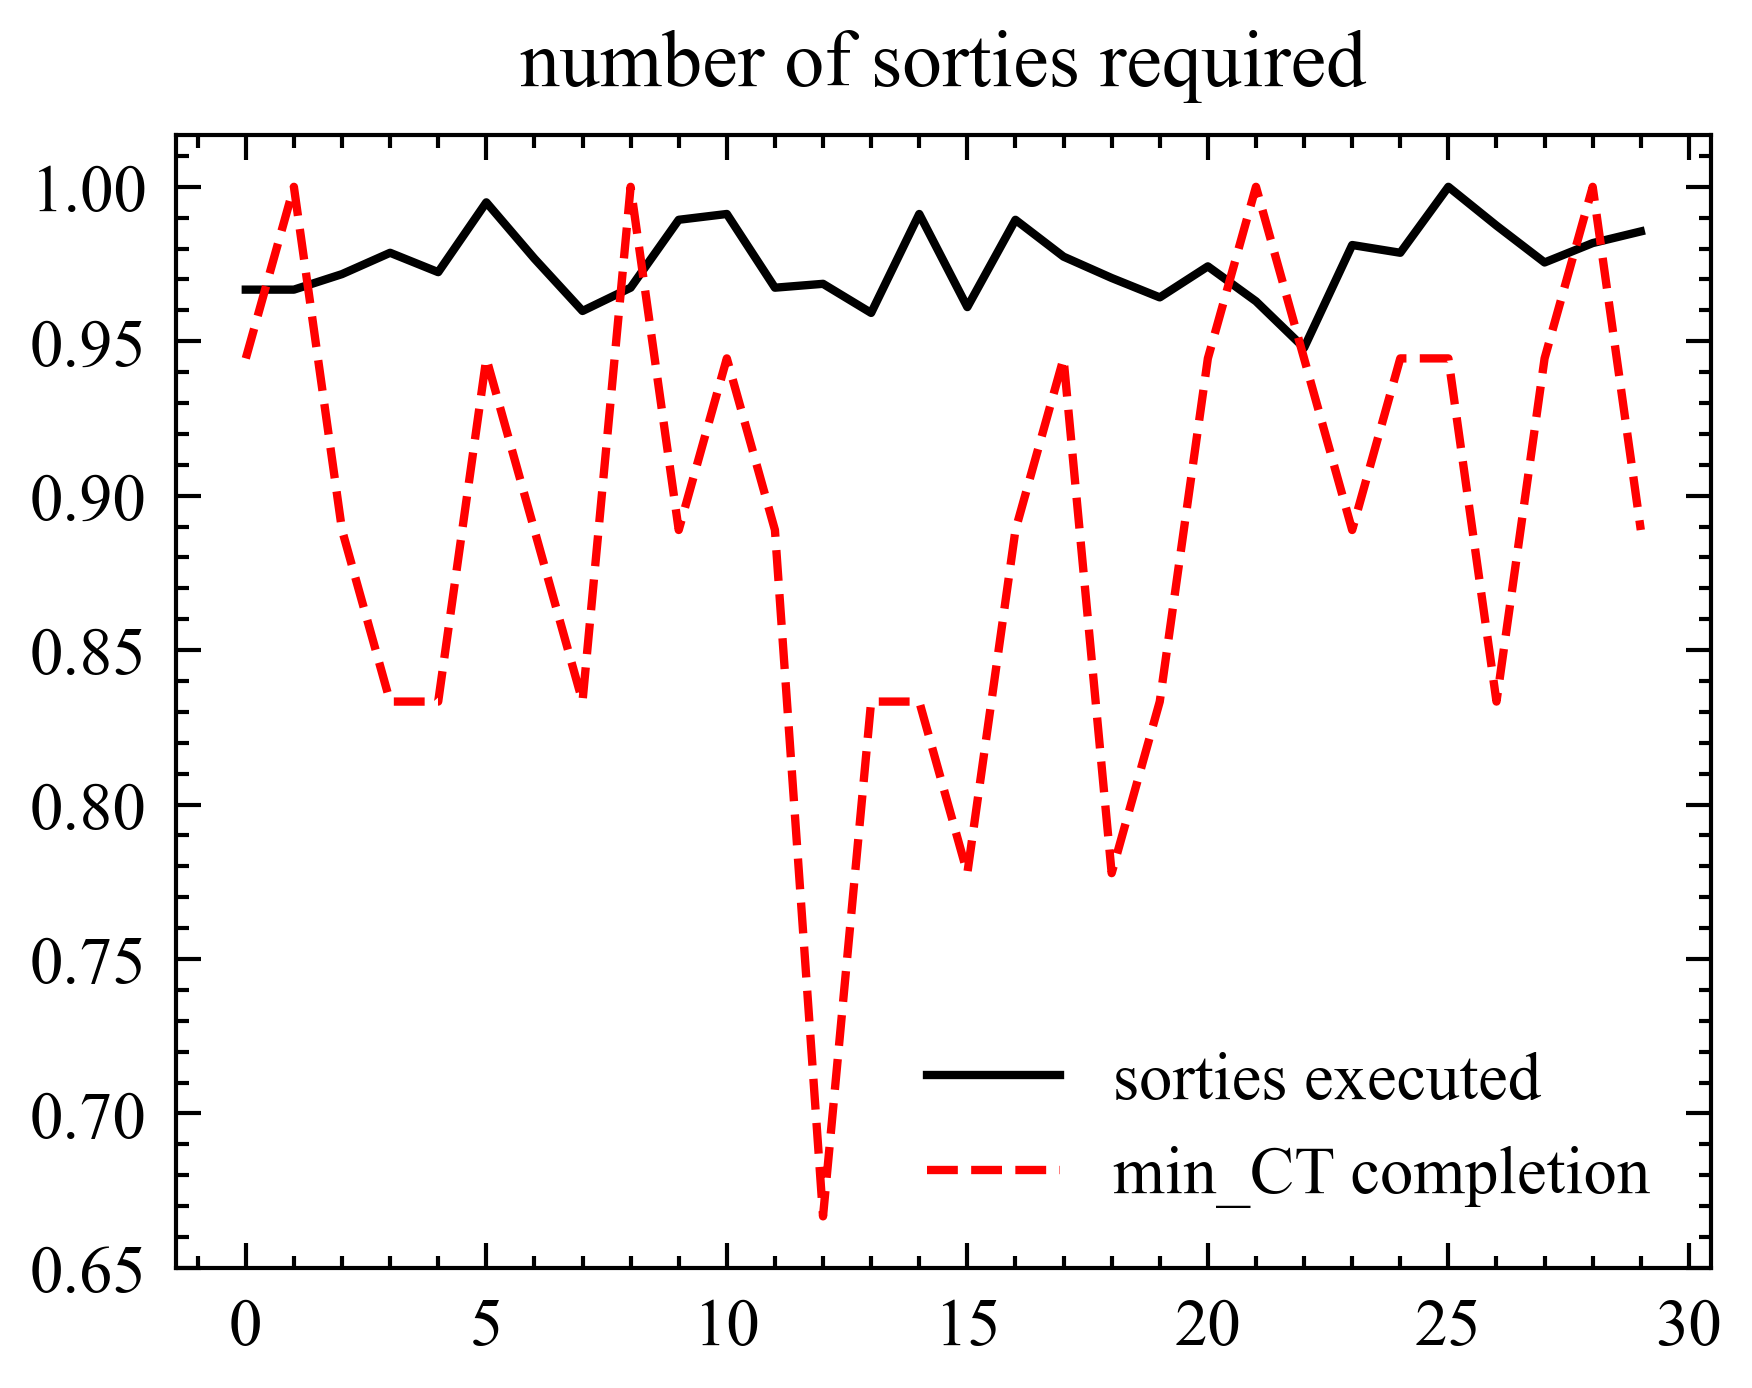

In [13]:
plt.plot(data[:,2]/max(data[:,2]), label='sorties executed')
plt.plot(data[:,0]/max(data[:,0]), c='r', label='min_CT completion')
plt.title('number of sorties required')
plt.legend()
plt.savefig('sorties_normalized.jpg', dpi=300)

In [14]:
covariance = np.cov(data[:,2]/max(data[:,2]), (data[:,0]/10))
r_pearson = pearsonr(data[:,2], data[:,0])
print(r_pearson[0]) #pearson r
print(r_pearson[1]) #significance for pearson r

0.12816437238241607
0.499708383739737


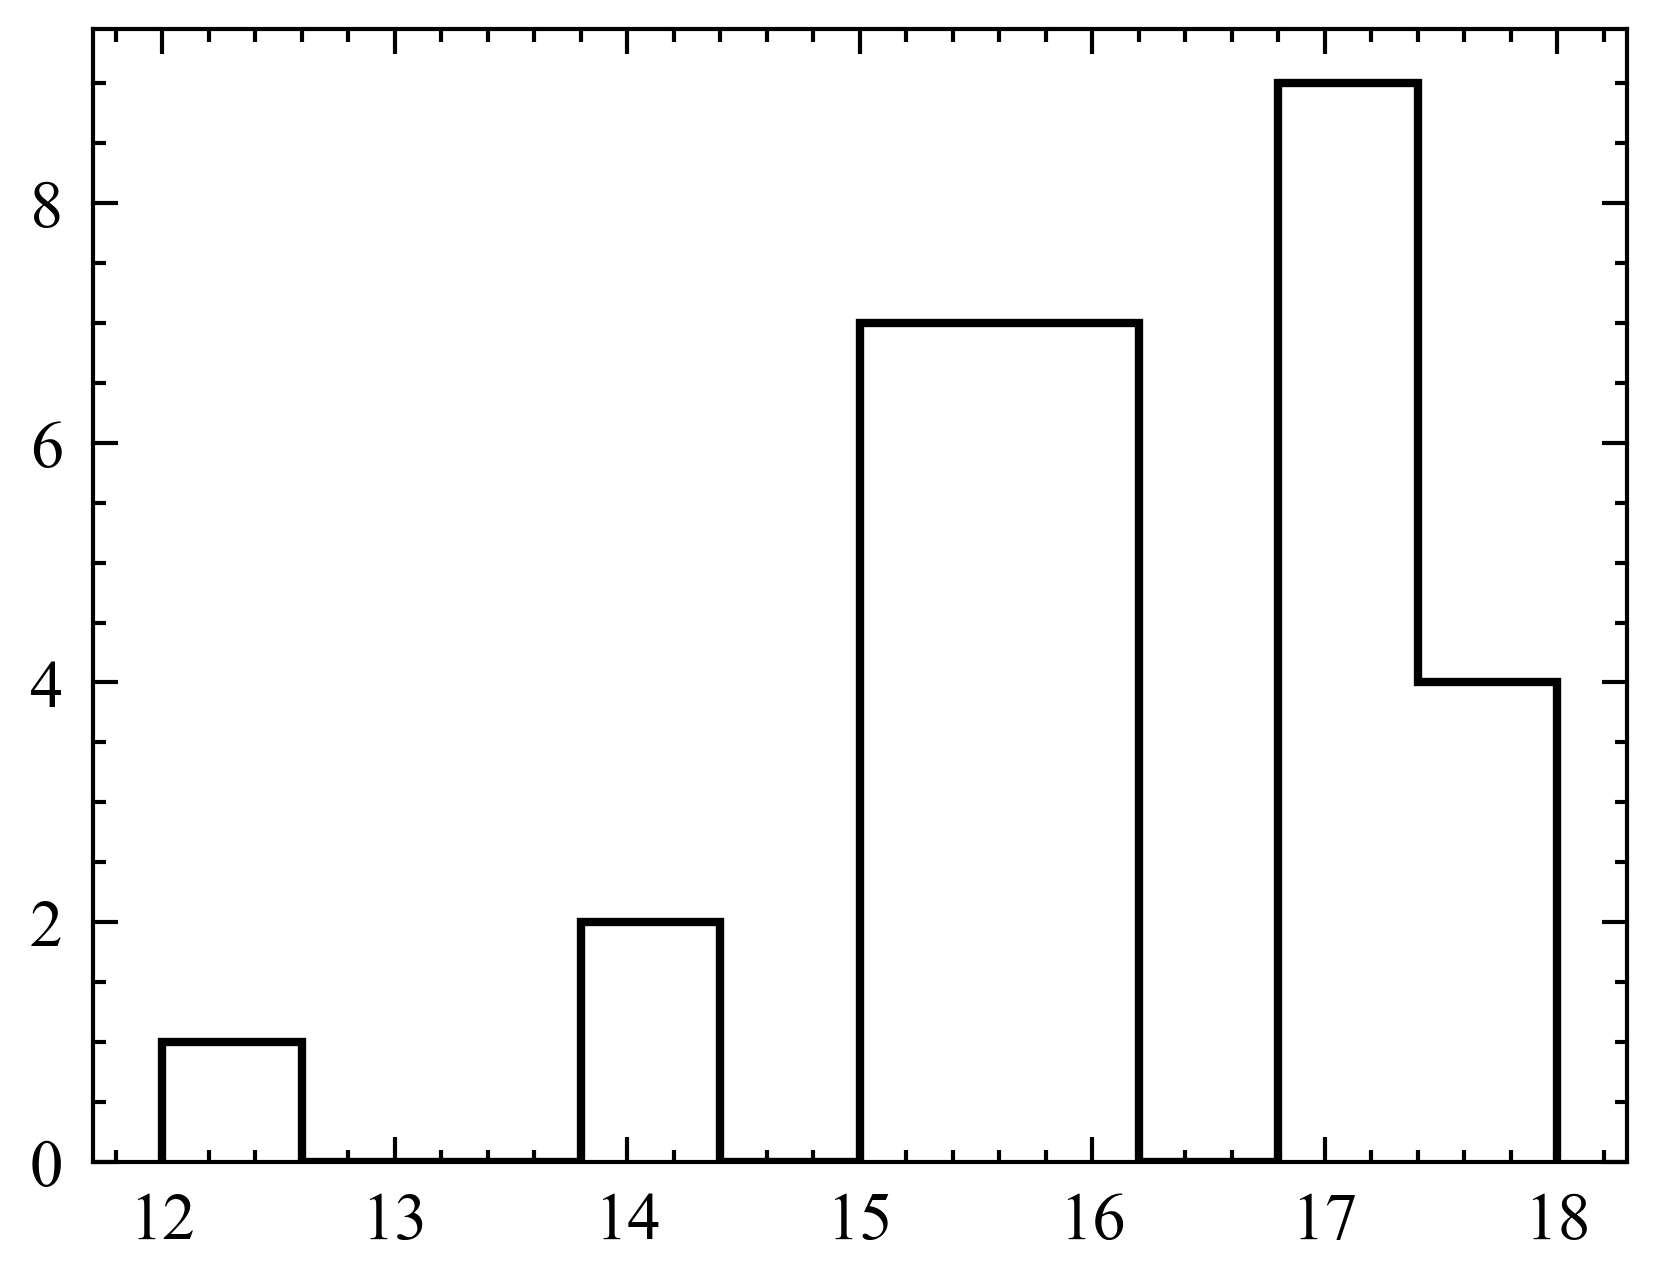

In [15]:
plt.hist(data[:,0], histtype='step')
plt.show()

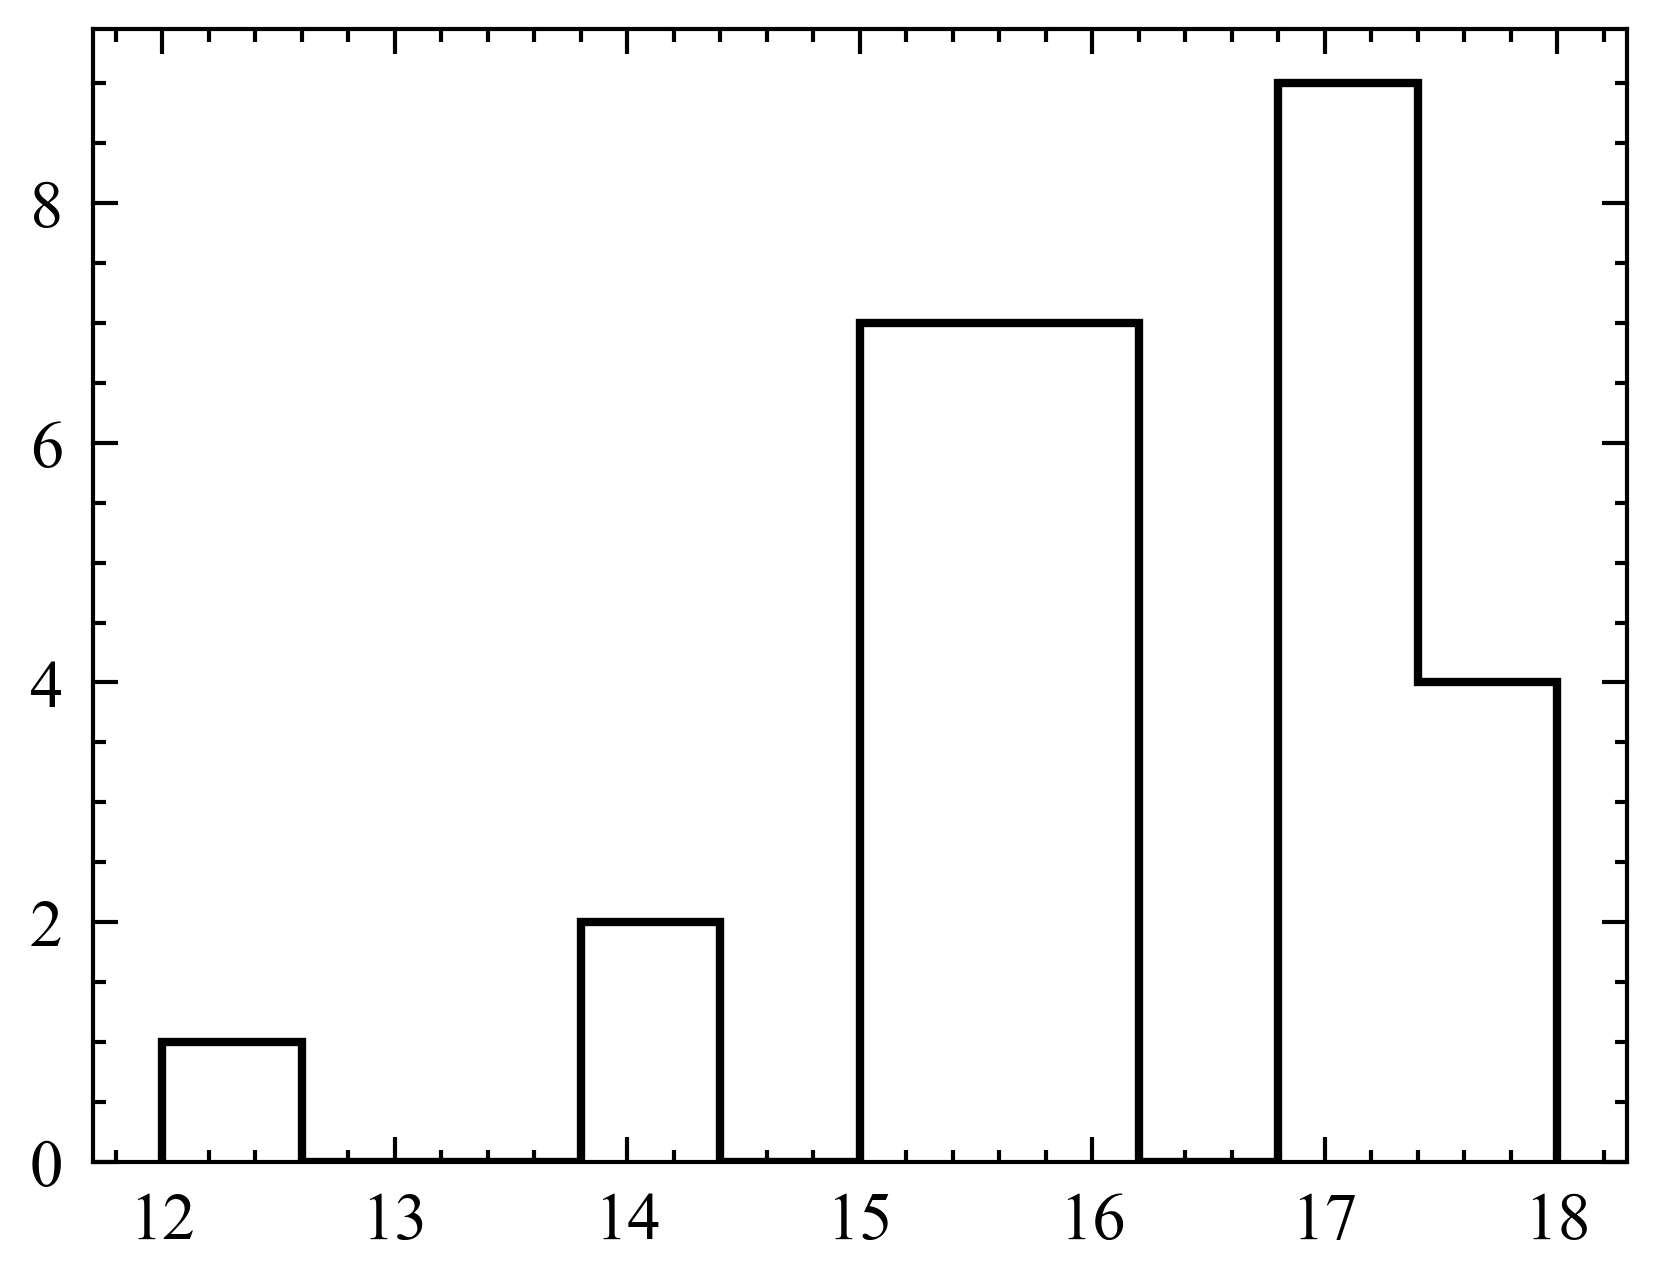

In [16]:
plt.hist(data[0:70,0], histtype='step')
plt.show()